<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Sep8-9/Sep8_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATOS DE CLASE

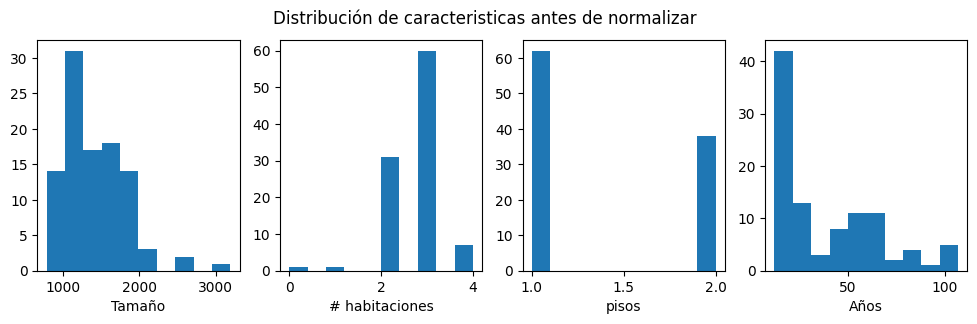

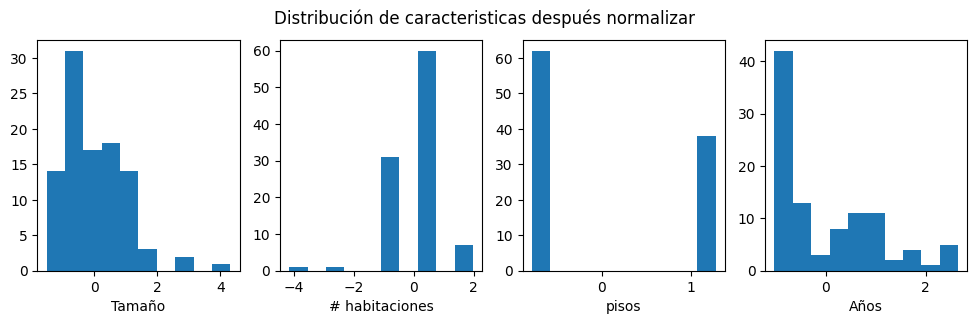

SGDRegressor(learning_rate='constant')
number of iterations completed: 20, number of weight updates: 2001.0
model parameters:                   w: [362.5829277], b:[111.49056544 -21.23232685 -31.8483426  -38.15679737]


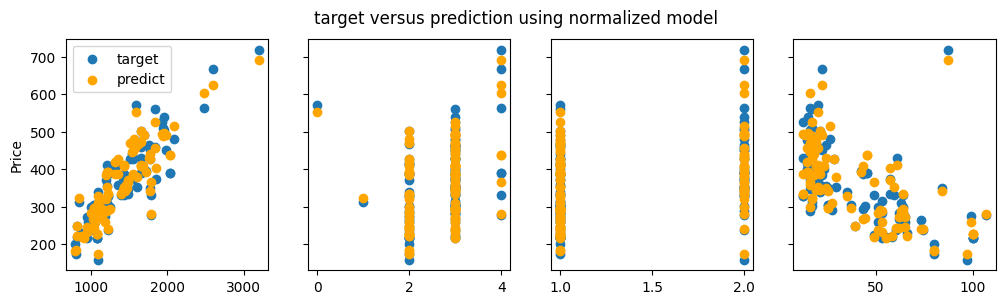

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

houses=np.loadtxt("/content/drive/MyDrive/ML2023/houses.txt",delimiter=',')
Xh=houses[:,:4]

th=houses[:,4] #Costo de la Casa"
labels=["Tamaño","# habitaciones","pisos","Años"]

scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)

fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas antes de normalizar ")
plt.show()

fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas después normalizar ")
plt.show()

sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, th)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'target')
    ax[i].scatter(Xh[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()


In [6]:
#Split in Train and Test samples.

X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

#Solve using Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")
#Test score
sgdr.score(X_test,y_test)

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 27, number of weight updates: 1891.0
model parameters:                   w: [361.78346659], b:[110.5123579  -22.30197465 -35.02171376 -38.36570828]


0.9627284670984103

In [7]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

input_dim = 4
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
num_epochs = 100
batch_size =X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 415ms/step - loss: 140471.4531
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 134877.4531
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 129512.6719
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 124367.5000
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 119432.7031
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 114699.4609
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 110159.3594
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 105804.3281
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 101626.6484
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 97618.9453
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 93774.1406
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 90085.4844

In [8]:

capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[-0.7763986 ]
 [-0.2951311 ]
 [-0.80702573]
 [ 0.35892975]] [0.]


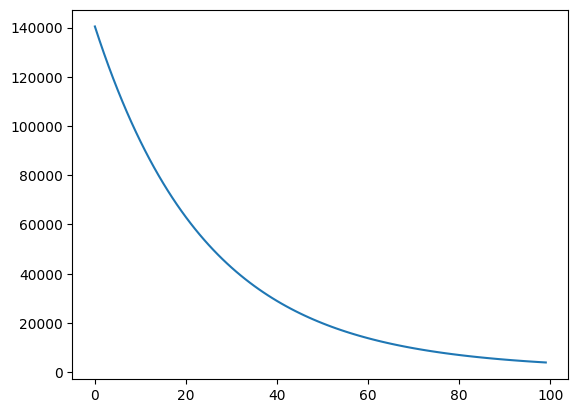

In [11]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();



In [12]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 808.5734
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 802.9100
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 797.3564
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 791.9097
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 786.5665
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 781.3242
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 776.1806
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 771.1324
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 766.1774
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 761.3132
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 756.5375
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 751.8480
Epoch 13/100
1/1 [==============

# Datos tarea

In [20]:
data1 = np.loadtxt("/content/drive/MyDrive/ML2023/Datos.txt", delimiter=',').T
Xh = data1[0].reshape(-1,1)
th = data1[1]



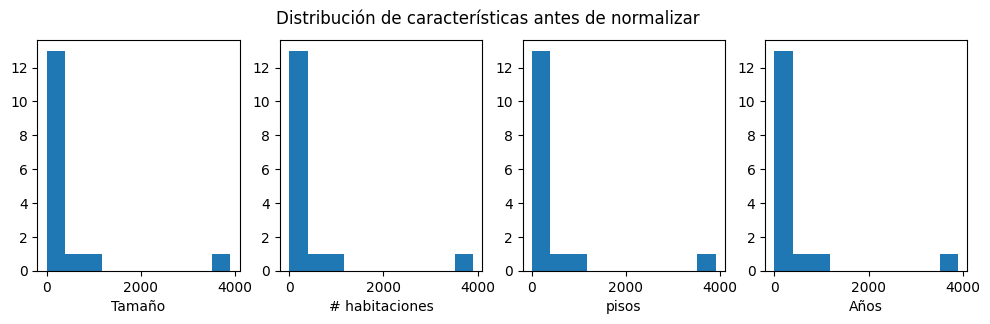

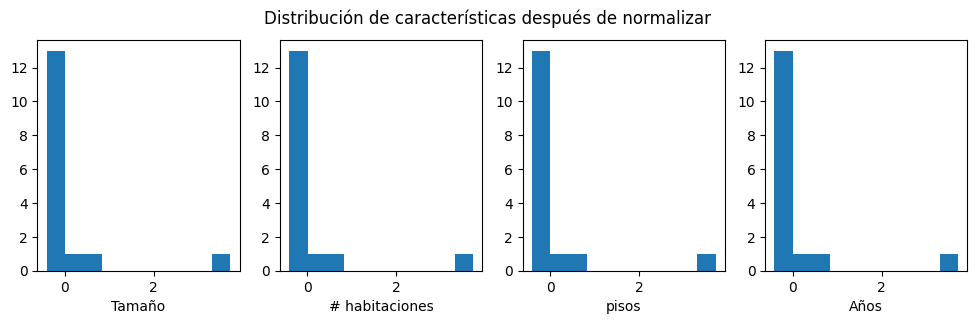

SGDRegressor(learning_rate='constant')
number of iterations completed: 32, number of weight updates: 513.0
model parameters: w: [31.26672728], b: [-11.68504264]


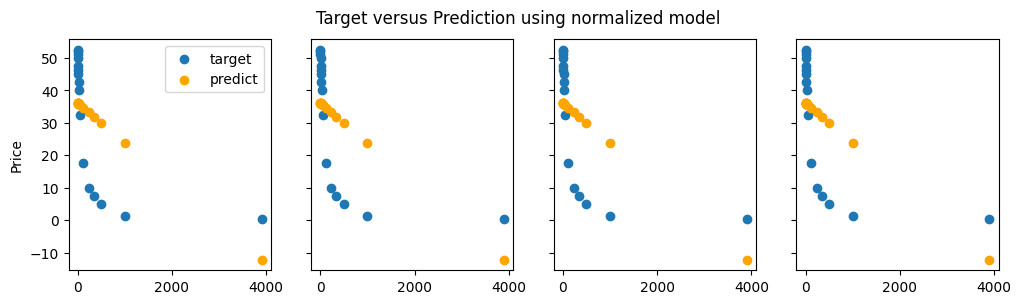

In [22]:
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)

# Gráfico de distribución antes de normalizar
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh[:, 0])  # Cambia Xh[:, i] a Xh[:, 0] si tienes un solo atributo
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de características antes de normalizar")
plt.show()

# Gráfico de distribución después de normalizar
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:, 0])  # Cambia Xh_norm[:, i] a Xh_norm[:, 0] si tienes un solo atributo
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de características después de normalizar")
plt.show()

# Entrena el modelo
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, th)

print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w0_norm}, b: {w_norm}")

# Predicción del objetivo utilizando características normalizadas
yp = w0_norm + np.dot(Xh_norm, w_norm)

# Gráfico de predicciones
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:, 0], th, label='target')
    ax[i].scatter(Xh[:, 0], yp, color="orange", label='predict')
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target versus Prediction using normalized model")
plt.show()

In [23]:
#Split in Train and Test samples.

X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

#Solve using Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")
#Test score
sgdr.score(X_test,y_test)

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 100, number of weight updates: 1101.0
model parameters:                   w: [25.48950906], b:[-31.65998362]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-2.486857887343655

In [27]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Xh_norm = scaler.fit_transform(Xh)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

# Resolver usando Scikit-learn
sgdr = SGDRegressor(max_iter=100, loss="squared_error", learning_rate='constant', eta0=0.01, penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w0_norm}, b: {w_norm}")

# Puntuación de prueba
test_score = sgdr.score(X_test, y_test)
print(f"Test Score: {test_score}")

# Crear un modelo de red neuronal con Keras
model = Sequential()

input_dim = X_train.shape[1]  # Número de características (atributos)
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

# Entrenar el modelo de la red neuronal
num_epochs = 100
batch_size = X_train.shape[0]
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 100, number of weight updates: 1101.0
model parameters: w: [25.48599455], b: [-31.67087643]
Test Score: -2.4898877206549024
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


1/1 [==============================] - 0s 261ms/step - loss: 1440.4656
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 1388.4283
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 1338.6265
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 1290.9634
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 1245.3468
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 1201.6882
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 1159.9036
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 1119.9120
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 1081.6359
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 1045.0015
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 1009.9380
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 976.3777
Epoch 13/100
1/1 [=========

In [28]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[-14.656586]] [26.92079]


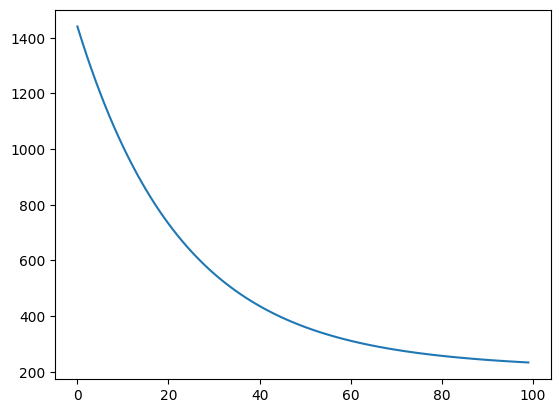

In [29]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();